In [80]:
# Import related function library
import numpy as np
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
import warnings
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.wrappers import TimeDistributed
from keras.constraints import nonneg
warnings.filterwarnings("ignore")

In [25]:
# Read data
df = pd.read_csv('cs448b_ipasn.csv')
df.head(5)

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1


In [26]:
# According to 'date','l_ IPN 'for hierarchical classification
df['date']= pd.to_datetime(df['date'])
df = df.groupby(['date','l_ipn'],as_index=False).sum()

,date,l_ipn,r_asn,f
0,2006-07-01,0,436704,106
1,2006-07-01,1,182194,640
2,2006-07-01,2,212966,1677
3,2006-07-01,3,96376,22
4,2006-07-01,4,120507,184
5,2006-07-01,5,125647,44
6,2006-07-01,6,117227,63
7,2006-07-01,7,479524,411
8,2006-07-01,8,339609,448
9,2006-07-01,9,407669,1463


In [48]:
# The time series is constructed to convert the date into the corresponding days in a year
df['yday'] = df['date'].dt.dayofyear
df['wday'] = df['date'].dt.dayofweek
df.head()

,date,l_ipn,r_asn,f,yday,wday
0,2006-07-01,0,436704,106,182,5
1,2006-07-01,1,182194,640,182,5
2,2006-07-01,2,212966,1677,182,5
3,2006-07-01,3,96376,22,182,5
4,2006-07-01,4,120507,184,182,5


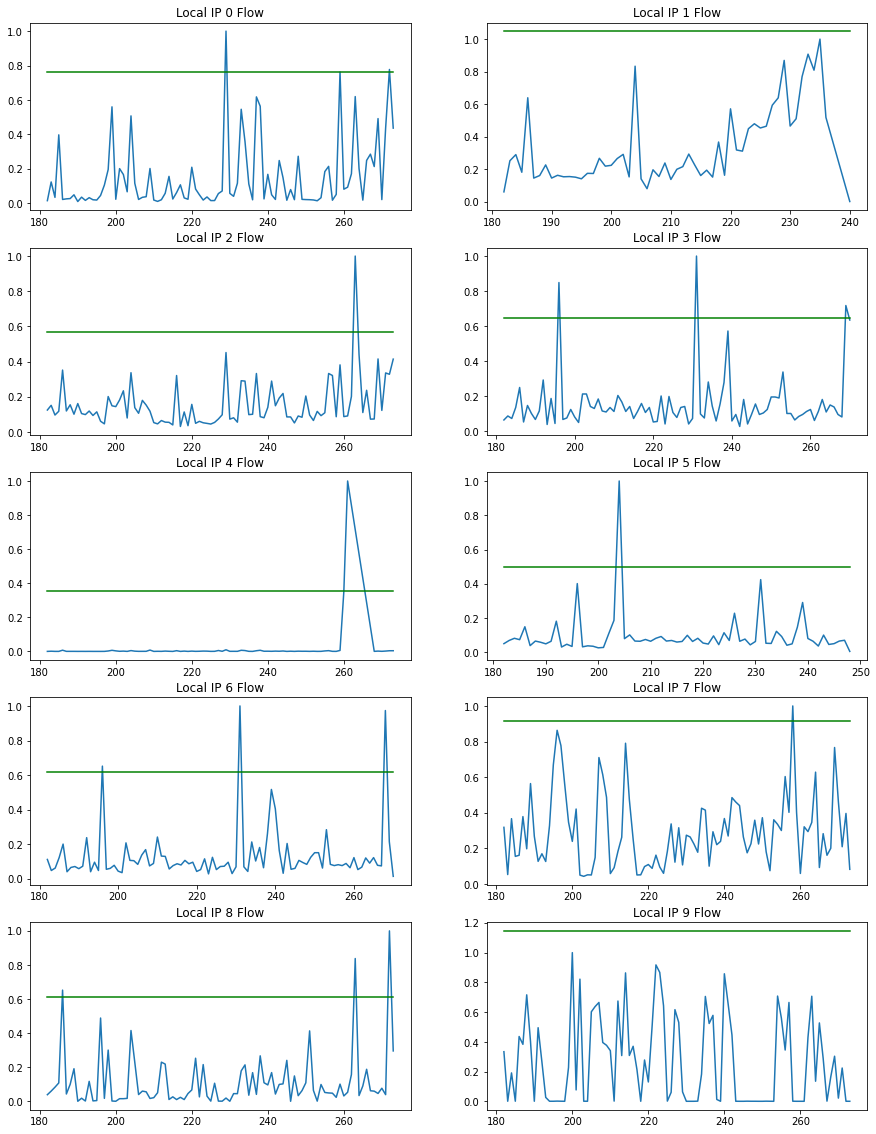

In [93]:
#  For each IP address connection data visualization analysis
f,axarray = plt.subplots(5,2,figsize=(15,20))
axarray[0,0].plot(ip0['yday'],ip0['f'])
#  Compare the statistical data
axarray[0,0].plot(ip0['yday'], [ip0['f'].mean() + 3*ip0['f'].std()]*len(ip0['yday']),color='g')
axarray[0,0].set_title("Local IP 0 Flow")

axarray[0,1].plot(ip1['yday'], ip1['f'])
axarray[0,1].plot(ip1['yday'], [ip1['f'].mean() + 3*ip1['f'].std()]*len(ip1['yday']),color='g')
axarray[0,1].set_title("Local IP 1 Flow")

axarray[1,0].plot(ip2['yday'], ip2['f'])
axarray[1,0].set_title("Local IP 2 Flow")
axarray[1,0].plot(ip2['yday'], [ip2['f'].mean() + 3*ip2['f'].std(ddof=0)]*len(ip2['yday']),color='g')


axarray[1,1].plot(ip3['yday'], ip3['f'])
axarray[1,1].set_title("Local IP 3 Flow")
axarray[1,1].plot(ip3['yday'], [ip3['f'].mean() + 3*ip3['f'].std(ddof=0)]*len(ip3['yday']),color='g')


axarray[2,0].plot(ip4['yday'], ip4['f'])
axarray[2,0].set_title("Local IP 4 Flow")
axarray[2,0].plot(ip4['yday'], [ip4['f'].mean() + 3*ip4['f'].std(ddof=0)]*len(ip4['yday']),color='g')

axarray[2,1].plot(ip5['yday'], ip5['f'])
axarray[2,1].set_title("Local IP 5 Flow")
axarray[2,1].plot(ip5['yday'], [ip5['f'].mean() + 3*ip5['f'].std(ddof=0)]*len(ip5['yday']),color='g')

axarray[3,0].plot(ip6['yday'], ip6['f'])
axarray[3,0].set_title("Local IP 6 Flow")
axarray[3,0].plot(ip6['yday'], [ip6['f'].mean() + 3*ip6['f'].std(ddof=0)]*len(ip6['yday']),color='g')

axarray[3,1].plot(ip7['yday'], ip7['f'])
axarray[3,1].set_title("Local IP 7 Flow")
axarray[3,1].plot(ip7['yday'], [ip7['f'].mean() + 3*ip7['f'].std(ddof=0)]*len(ip7['yday']),color='g')

axarray[4,0].plot(ip8['yday'], ip8['f'])
axarray[4,0].set_title("Local IP 8 Flow")
axarray[4,0].plot(ip8['yday'], [ip8['f'].mean() + 3*ip8['f'].std(ddof=0)]*len(ip8['yday']),color='g')


axarray[4,1].plot(ip9['yday'], ip9['f'])
axarray[4,1].set_title("Local IP 9 Flow")
axarray[4,1].plot(ip9['yday'], [ip9['f'].mean() + 3*ip9['f'].std(ddof=0)]*len(ip9['yday']),color='g')

In [79]:
# Take out each IP address, and the maximum number of connections for each IP address
ip0 = df[df['l_ipn']==0]
max0 = np.max(ip0['f'])
ip1 = df[df['l_ipn']==1]
max1 = np.max(ip1['f'])
ip2 = df[df['l_ipn']==2]
max2 = np.max(ip2['f'])
ip3 = df[df['l_ipn']==3]
max3 = np.max(ip3['f'])
ip4 = df[df['l_ipn']==4]
max4 = np.max(ip4['f'])
ip5 = df[df['l_ipn']==5]
max5 = np.max(ip5['f'])
ip6 = df[df['l_ipn']==6]
max6 = np.max(ip6['f'])
ip7 = df[df['l_ipn']==7]
max7 = np.max(ip7['f'])
ip8 = df[df['l_ipn']==8]
max8 = np.max(ip8['f'])
ip9 = df[df['l_ipn']==9]
max9 = np.max(ip9['f'])

### `LSTM` network

In [87]:
# Divide each connection times by the maximum number to get the data suitable for computer processing
fv =[float(v)/float(max0) for v in ip0['f'].values]
ip0.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max1) for v in ip1['f'].values]
ip1.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max2) for v in ip2['f'].values]
ip2.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max3) for v in ip3['f'].values]
ip3.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max4) for v in ip4['f'].values]
ip4.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max5) for v in ip5['f'].values]
ip5.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max6) for v in ip6['f'].values]
ip6.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max7) for v in ip7['f'].values]
ip7.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max8) for v in ip8['f'].values]
ip8.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max9) for v in ip9['f'].values]
ip9.loc[:,'f'] =np.array(fv).reshape(-1,1)  

In [34]:
# How long does it take to create a dataset and trace back its history (use 'f' and 'WDAY' to work together)
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)].values
        dataX.append(a)
        dataY.append(dataset['f'].iloc[i + look_back])
    return np.array(dataX), np.array(dataY)

In [1]:
# Back to the historical base
look_back = 14
# Create LSTM network
def trainModel(data):
    #prepare 
    data['f'] = data['f'].astype('float32')
    train = data[0:look_back*5].copy()
    trainX, trainY = create_dataset(train, look_back)
    trainX = np.reshape(trainX, (trainX.shape[0], look_back, 2))
    # LSTM network architecture
    model = Sequential()
    model.add(LSTM(64,input_shape=(trainX.shape[1], trainX.shape[2]),
               return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=16, verbose=0)
    return model

In [52]:
# Predict the number of network connections in the next n days,
def predictFlow(_model,data):
    ypred=[0]*look_back
    for k in range(len(data)-look_back):
        pattern = data[k:k+look_back].values
        x = np.reshape(pattern, (1, len(pattern), 2))
        ypred.append(_model.predict(x)[0][0])
    return ypred

In [91]:
# For each local IP prediction
m0 = trainModel(ip0[['f','wday']].copy())
m1 = trainModel(ip1[['f','wday']].copy())
m2 = trainModel(ip2[['f','wday']].copy())
m3 = trainModel(ip3[['f','wday']].copy())
m4 = trainModel(ip4[['f','wday']].copy())
m5 = trainModel(ip5[['f','wday']].copy())
m6 = trainModel(ip6[['f','wday']].copy())
m7 = trainModel(ip7[['f','wday']].copy())
m8 = trainModel(ip8[['f','wday']].copy())
m9 = trainModel(ip9[['f','wday']].copy())

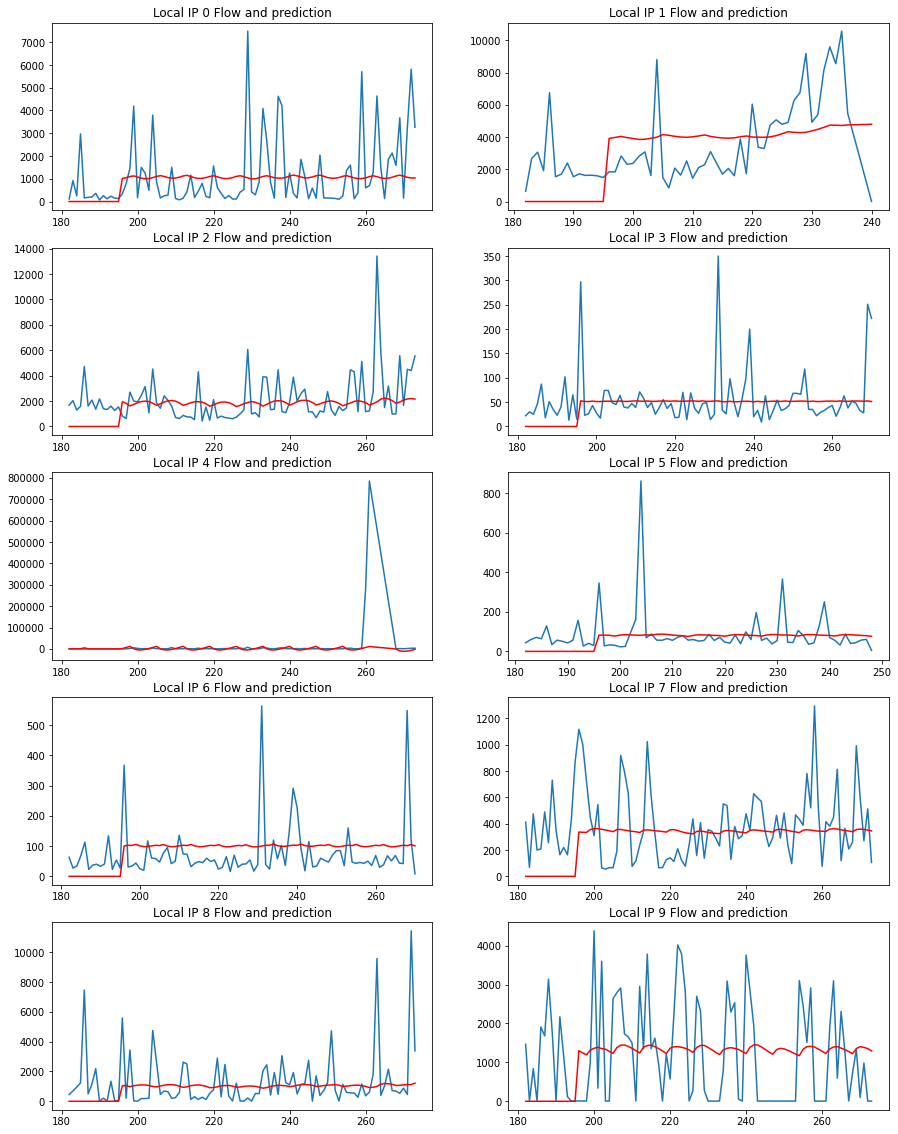

In [89]:
"""
Forecast the model, get the results and trace back to the original data; And data visualization 
(comparing the predicted value with the original data)
"""
f,axarray = plt.subplots(5,2,figsize=(15,20))

# The predicted value is restored
ypred0 = np.multiply(predictFlow(m0,ip0[['f','wday']].copy()),max0)
# Restore the scaled value
ip0f = np.multiply(ip0['f'],max0)

ypred1 = np.multiply(predictFlow(m1,ip1[['f','wday']].copy()),max1)
ip1f = np.multiply(ip1['f'],max1)

ypred2 = np.multiply(predictFlow(m2,ip2[['f','wday']].copy()),max2)
ip2f = np.multiply(ip2['f'],max2)

ypred3 = np.multiply(predictFlow(m3,ip3[['f','wday']].copy()),max3)
ip3f = np.multiply(ip3['f'],max3)

ypred4 = np.multiply(predictFlow(m4,ip4[['f','wday']].copy()),max4)
ip4f = np.multiply(ip4['f'],max4)

ypred5 = np.multiply(predictFlow(m5,ip5[['f','wday']].copy()),max5)
ip5f = np.multiply(ip5['f'],max5)

ypred6 = np.multiply(predictFlow(m6,ip6[['f','wday']].copy()),max6)
ip6f = np.multiply(ip6['f'],max6)

ypred7 = np.multiply(predictFlow(m7,ip7[['f','wday']].copy()),max7)
ip7f = np.multiply(ip7['f'],max7)

ypred8 = np.multiply(predictFlow(m8,ip8[['f','wday']].copy()),max8)
ip8f = np.multiply(ip8['f'],max8)

ypred9 = np.multiply(predictFlow(m9,ip9[['f','wday']].copy()),max9)
ip9f = np.multiply(ip9['f'],max9)

axarray[0,0].plot(ip0['yday'],ip0f)
axarray[0,0].plot(ip0['yday'],ypred0,color='r')
axarray[0,0].set_title("Local IP 0 Flow and prediction")

axarray[0,1].plot(ip1['yday'], ip1f)
axarray[0,1].plot(ip1['yday'], ypred1,color='r',alpha=1)
axarray[0,1].set_title("Local IP 1 Flow and prediction")

axarray[1,0].plot(ip2['yday'], ip2f)
axarray[1,0].plot(ip2['yday'], ypred2,color='r',alpha=1)
axarray[1,0].set_title("Local IP 2 Flow and prediction")

axarray[1,1].plot(ip3['yday'], ip3f)
axarray[1,1].plot(ip3['yday'], ypred3,color='r',alpha=1)
axarray[1,1].set_title("Local IP 3 Flow and prediction")

axarray[2,0].plot(ip4['yday'], ip4f)
axarray[2,0].plot(ip4['yday'], ypred4,color='r',alpha=1)
axarray[2,0].set_title("Local IP 4 Flow and prediction")

axarray[2,1].plot(ip5['yday'], ip5f)
axarray[2,1].plot(ip5['yday'], ypred5,color='r',alpha=1)
axarray[2,1].set_title("Local IP 5 Flow and prediction")

axarray[3,0].plot(ip6['yday'], ip6f)
axarray[3,0].plot(ip6['yday'], ypred6,color='r',alpha=1)
axarray[3,0].set_title("Local IP 6 Flow and prediction")

axarray[3,1].plot(ip7['yday'], ip7f)
axarray[3,1].plot(ip7['yday'], ypred7,color='r',alpha=1)
axarray[3,1].set_title("Local IP 7 Flow and prediction")

axarray[4,0].plot(ip8['yday'], ip8f)
axarray[4,0].plot(ip8['yday'], ypred8,color='r',alpha=1)
axarray[4,0].set_title("Local IP 8 Flow and prediction")

axarray[4,1].plot(ip9['yday'], ip9f)
axarray[4,1].plot(ip9['yday'], ypred9,color='r',alpha=1)
axarray[4,1].set_title("Local IP 9 Flow and prediction")
plt.show()

In [95]:
# Calculate the correlation between the predicted value and the original value
corr0 = pd.Series(ip0f).corr(pd.Series(ypred0))
corr1 = pd.Series(ip1f).corr(pd.Series(ypred1))
corr2 = pd.Series(ip2f).corr(pd.Series(ypred2))
corr3 = pd.Series(ip3f).corr(pd.Series(ypred3))
corr4 = pd.Series(ip4f).corr(pd.Series(ypred4))
corr5 = pd.Series(ip5f).corr(pd.Series(ypred5))
corr6 = pd.Series(ip6f).corr(pd.Series(ypred6))
corr7 = pd.Series(ip7f).corr(pd.Series(ypred7))
corr8 = pd.Series(ip8f).corr(pd.Series(ypred8))
corr9 = pd.Series(ip9f).corr(pd.Series(ypred9))
corrdf = pd.DataFrame({'corr0':[corr0],
                       'corr1':[corr1],
                       'corr2':[corr2],
                       'corr3':[corr3],
                       'corr4':[corr4],
                       'corr5':[corr5],
                       'corr6':[corr6],
                       'corr7':[corr7],
                       'corr8':[corr8],
                       'corr9':[corr9]})
corrdf

,corr0,corr1,corr2,corr3,corr4,corr5,corr6,corr7,corr8,corr9
0,0.059998,0.343055,0.150164,0.312873,0.756957,0.250174,-0.194532,-0.130886,0.163111,-0.164771


### `LatentDirichletAllocation` Make predictions

In [2]:
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
lad = LatentDirichletAllocation()